In [2]:
#Visualize  the distributuion of CGPA
#Import necessary libraries.
#Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).
#Use Seaborn’s histplot to create a histogram of the CGPA categories.
#Customize the histogram with an appropriate color and add a title.
#Display the plot.

#Excercise 1
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
data = pd.read_csv('Student Mental health.csv')
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


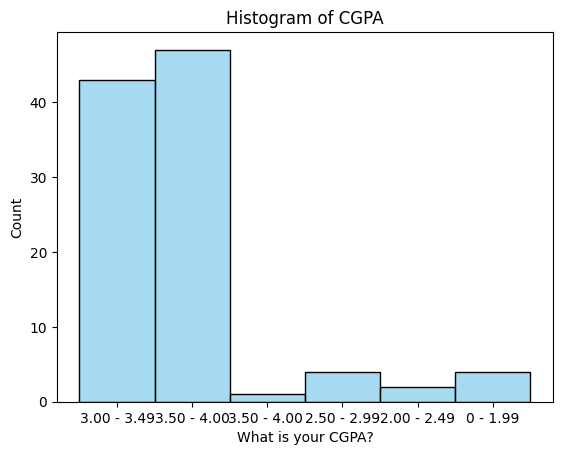

In [3]:
sns.histplot(data['What is your CGPA?'], bins= [0, 1.99, 2.49, 2.99, 3.49, 4.00], color='skyblue')
plt.title('Histogram of CGPA')
plt.show()

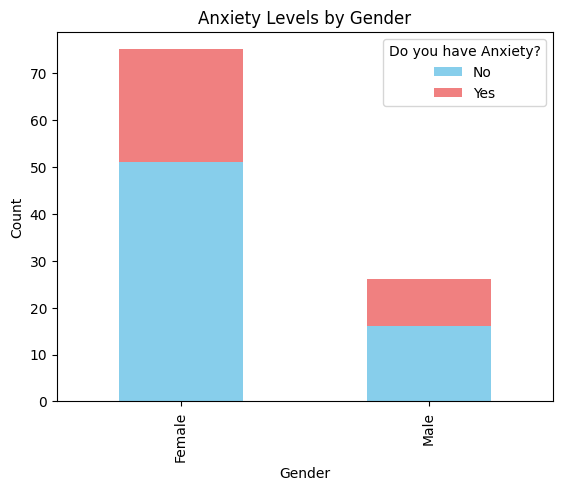

In [4]:
#Exercise 2
#Use a bar plot to compare the proportion of students experiencing anxiety across different genders.
#Dataset Overview: The dataset includes a ‘Do you have Anxiety?’ column with responses and a ‘Choose your gender’ column.
##Tasks:
#Import necessary libraries.
#Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.
#Customize your plot with an appropriate color palette.
#Add a title to your plot.
#Display the plot.

anxiety_by_gender = data.groupby(['Choose your gender', 'Do you have Anxiety?'])['Do you have Anxiety?'].count().unstack()
anxiety_by_gender.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Anxiety Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

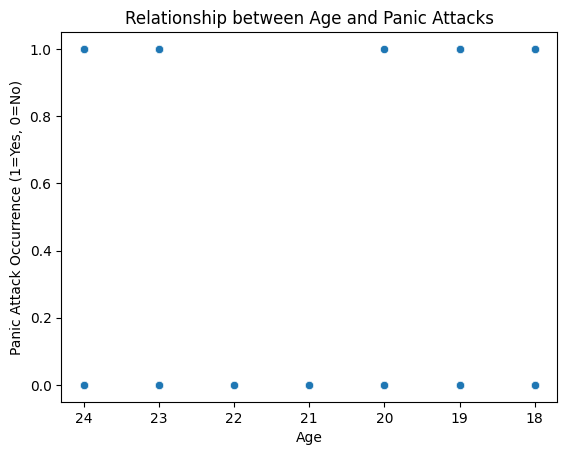

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame and has columns 'Age' and 'Do you have Panic attack?'

data['Panic Attack Numeric'] = data['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})


# Create the scatterplot using Seaborn
sns.scatterplot(x='Age', y='Panic Attack Numeric', data=data)
plt.title('Relationship between Age and Panic Attacks')
plt.xlabel('Age')
plt.ylabel('Panic Attack Occurrence (1=Yes, 0=No)')
ax = plt.gca()
ax.invert_xaxis()
plt.show()

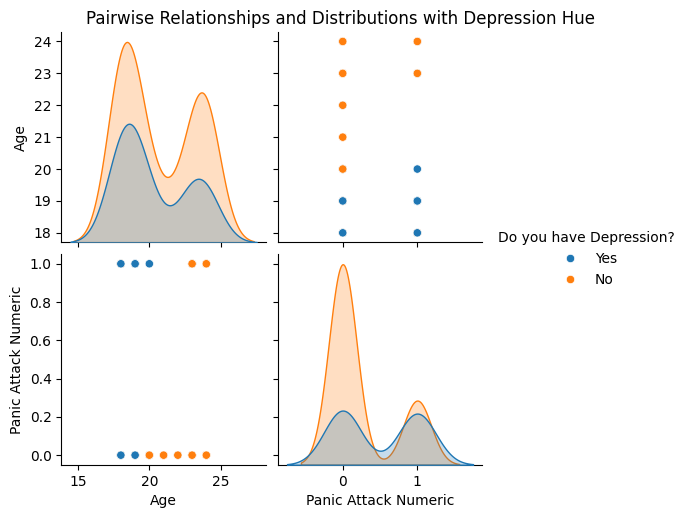

In [14]:
subset_data = data[['Age', 'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?', 'Panic Attack Numeric']]
sns.pairplot(subset_data, hue='Do you have Depression?')
plt.suptitle('Pairwise Relationships and Distributions with Depression Hue', y=1.02)  # Adjust title position
plt.show()

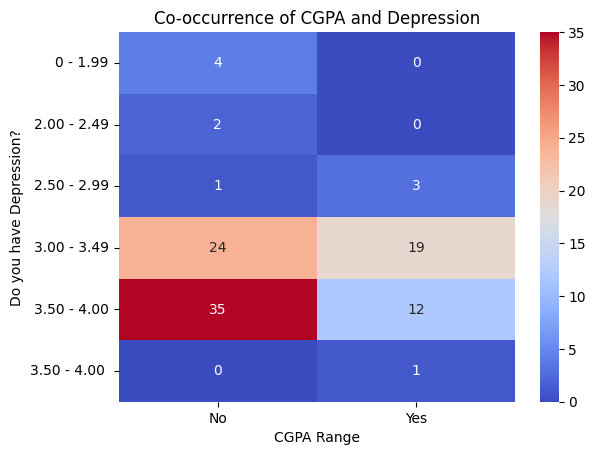

In [19]:
cross_tab = pd.crosstab(subset_data['What is your CGPA?'], subset_data['Do you have Depression?'])

# Plot the heatmap using Seaborn
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')  # 'fmt='d'' displays counts as integers
plt.title('Co-occurrence of CGPA and Depression')
plt.xlabel('CGPA Range')
plt.ylabel('Do you have Depression?')
plt.show()

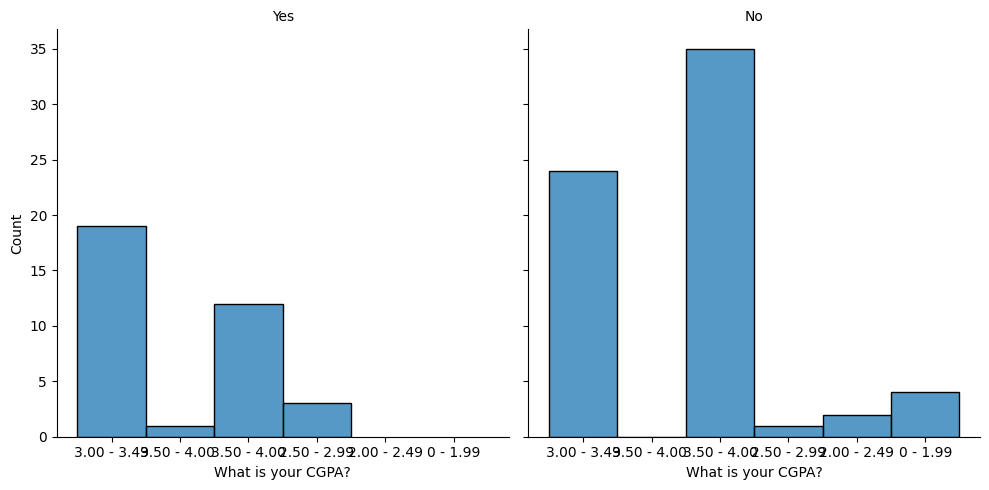

In [20]:
g = sns.FacetGrid(subset_data, col='Do you have Depression?', height=5)

# Map the histplot to each facet
g.map(sns.histplot, 'What is your CGPA?')

# Set titles for each facet
g.set_titles(col_template="{col_name}")

# Adjust layout
plt.tight_layout()
plt.show()